# Group Members:

   Name 1 : **Leticia Martín Cabrera - 230781**
 
  Name 2 : **Júlia Ruiz Valero - 230308**

# Lab 3 Assignment (Part 1)

**Goal of the practical session and summary of the topic**:

<font color="blue"> In this first part of the practical session we will work with quadratic functions and how they are minimized. We will work with the gradient descent method and conjugate gradient. 

<font color="blue"> From theory, we know that the gradient descent method is one of the most popular line search methods. In these methods we calculate stationary points from differentiable functions. More specifically, the gradient descent method is described as: 
 

<font color="blue">x<sub>k+1</sub> = x<sub>k</sub> − αr<sub>k</sub> , where r = ∇f(x<sub>k</sub>). <font>

<font color="blue"> Moreover, we also know that the gradient descent, in the worst case, has a linear convergence.

<font color="blue"> On the other hand, the conjugate gradient method is a method of conjugate directions constructed by applying Gram-Schmidt to a basis formed by the gradient of the function at each iteration. The method os conjugate directions starts from a basis of n conjugate directions d<sub>0</sub>,d<sub>1</sub>,...., d<sub>N-1</sub> with <d<sub>1</sub>, Ad<sub>j</sub>> = 0 if i ≠ j. With this method, our goal is to achieve the optimal solution in just N steps, that is, using each direction just once. In the i-th steo we move in the direction d<sub>i</sub>: 

<font color="blue"> x<sub>i+1</sub> = x<sub>i</sub> + αd<sub>i</sub>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from IPython.display import clear_output, display

#### **1. Which of the following matrices are positive, semipositive or negative definite?**


<font color="blue"> - We say that  a nxn matrix is positive definite if A is symmetric and <Ax,x> > 0 for and x ϵ ℝ. Moreover, we know that all eigenvalues of a positive definite matrix are > 0.

<font color="blue">-  We say that  a nxn matrix is positive semidefinite if A is symmetric and <Ax,x> ≥ 0 for and x ϵ ℝ. We also know that all eigenvalues of a positive semidefinite matrix are ≥ 0.

<font color="blue"> -  We say that  a nxn matrix is negative definite if A is symmetric and <Ax,x> < 0 for and x ϵ ℝ. The eigenvalues of this matrix are < 0.
 
 <font color="blue"> -  We say that  a nxn matrix is indefinite when it has both positive and negative eigenvalues.

 <font color="blue"> Following this criteria, we will write the corresponding code and we will classify the symmetric matrices below.





In [2]:
# Define the matrixes
D1 = np.matrix([[-2, 0], [0, 4]])
D2 = np.matrix([[0, 0], [0, 2]])
D3 = np.matrix([[0.5, 0], [0, 1.5]])
A1 = np.matrix([[1, -3], [-3, 1]])
A2 = np.matrix([[1, -1], [-1, 1]])
A3 = np.matrix([[1, -.5], [-.5, 1]])

In [3]:
# TODO: Build up the code to demonstrate which matrices are
#       positive definite and reasoning what you are implementing

for key, matrix in {"D1":D1,"D2":D2, "D3":D3, "A1":A1,"A2":A2, "A3":A3}.items():
  eig_values = np.linalg. eig (matrix)[0]
  if np.all(eig_values > 0):
    k = "Positive Definite"
  elif np.all(eig_values<0):
    k = "Negative Definite"
  elif np.all(eig_values>=0):
    k = "SemiPositive Definite"
  else:
    k = "Indefinite"
  print ("Matrix {} is {} with eigen_values = {}".format(key, k, eig_values))

Matrix D1 is Indefinite with eigen_values = [-2.  4.]
Matrix D2 is SemiPositive Definite with eigen_values = [0. 2.]
Matrix D3 is Positive Definite with eigen_values = [0.5 1.5]
Matrix A1 is Indefinite with eigen_values = [ 4. -2.]
Matrix A2 is SemiPositive Definite with eigen_values = [2. 0.]
Matrix A3 is Positive Definite with eigen_values = [1.5 0.5]



<font color="blue"> As it can be seen in the output of the code, D3 and A3 are positive definite, D2 and A2 are semipositive definite and D1 and A1 are indefinite matrices.

#### **2. The Python script quad_fun_main plots contours of the quadratic functions g<sub>i</sub>(x) =〈x, D<sub>i</sub>x〉and f<sub>i</sub>(x)  =〈x, A<sub>i</sub>x〉for  the  above  matrices.** 

In the plots above we can see two types of plots, the ones that are in 2D and the ones in 3D. 

<font color="blue"> From theory, we know that: <font>

<font color="blue"> -  If d<sub>1</sub> ≤ d<sub>2</sub> < 0, we obtain ellipses.

<font color="blue"> - If d<sub>1</sub> > 0 and d<sub>2</sub> < 0, then we obtain an hyperbole.

<font color="blue"> - If d<sub>1</sub> > 0 and d<sub>2</sub> = 0, then we obtain staight lines.


<font color="blue"> We can see that the plots are very similar two to two (F1 and G2, F2 and G3...).  What is different between them are they eigenbasis. 
The plot for G1, formed by the matrix D1, shows us an hyperbole, the plot for G2, formed by the matrix D1, shows us straight lines and the plot for G3 shows us ellipses. The same happens with F1, F2 and F3



- How  many  minima  does  each function have?  

  Answer: 

   <font color="blue"> The only ones that have minimas are G3 and F3. Concretely, they  have one minima.

  <font color="blue">  F1 and G1 have a saddle point and a similar situation happens for G2 and F2.










- Which is the relation between the g<sub>i</sub> and f<sub>i</sub>? 

  Answer: 

 <font color="blue"> We can see that the function g<sub>i</sub> is formed by the matrices D<sub>i</sub> and the function f<sub>i</sub> is formed by the matrices A<sub>i</sub>. We observe that the matrices D<sub>i</sub> have the same eigenvalues as they respective matrix A<sub>i</sub> for different eigenvectors. So, D<sub>i</sub> are the diagonal matrices of A<sub>i</sub>.

In [4]:
def quad_fun_main(matrixes: dict):
    # Define the x1 and x2 axis and mesh to draw the level lines
    x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
    x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
    X, Y = np.meshgrid(x1, x2)

    # Calculate Z
    x = np.matrix([X.T.flatten(), Y.T.flatten()])
    results = {}
    for key, matrix in matrixes.items():
        print("Procesing {}".format(key))
        aux = np.matmul(matrix, x)
        result = np.zeros((x1.shape[0], x2.shape[0]))
        for j in range(result.shape[0]):
            for i in range(result.shape[1]):
                result[i, j] = (x[:, result.shape[0] * j + i].T * aux[:, result.shape[0] * j + i])
        if key.startswith("D"):
            matrix_name = "G{}".format(key[-1])
        else:
            matrix_name = "F{}".format(key[-1])
        print("\tSaving as {}".format(matrix_name))
        results[matrix_name] = result

    # Plot the contours
    fig, axs = plt.subplots(nrows = int(len(results) / 3), 
                        ncols = 3, 
                        figsize = (14,8))
    for row in range(axs.shape[0]):
        for column in range(axs.shape[1]):
            matrix_name = list(results.keys())[axs.shape[0] * row + row + column]
            Z = results.get(matrix_name)
            axs[row, column].contour(X, Y, Z, 
                                     corner_mask = False, levels = 150, 
                                     linewidths=(1,), cmap = cm.coolwarm)
            axs[row, column].set_title(matrix_name)    
        
    # Plot the surfaces
    fig = plt.figure(figsize=(16, 10))
    for row in range(axs.shape[0]):
        for column in range(axs.shape[1]):
            ax = fig.add_subplot(axs.shape[0], axs.shape[1], axs.shape[0] * row + row + column + 1, projection='3d')
            matrix_name = list(results.keys())[axs.shape[0] * row + row + column]
            Z = results.get(matrix_name)
            ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
            ax.set_title(matrix_name)    

Procesing D1
	Saving as G1
Procesing D2
	Saving as G2
Procesing D3
	Saving as G3
Procesing A1
	Saving as F1
Procesing A2
	Saving as F2
Procesing A3
	Saving as F3


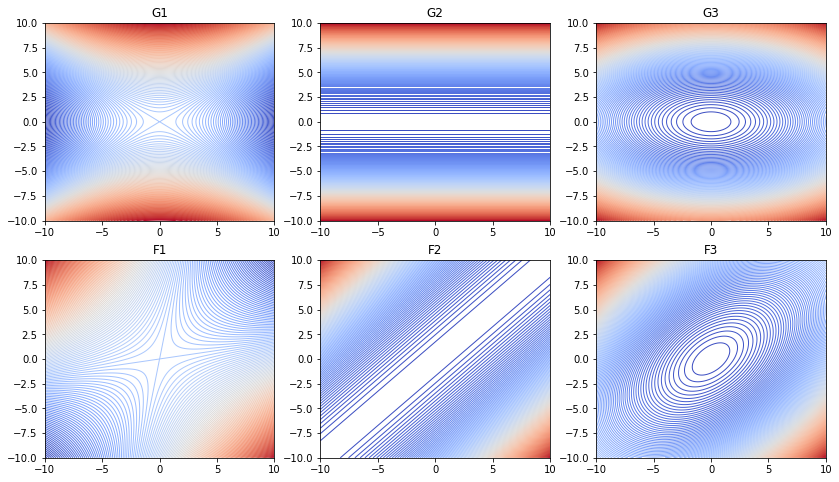

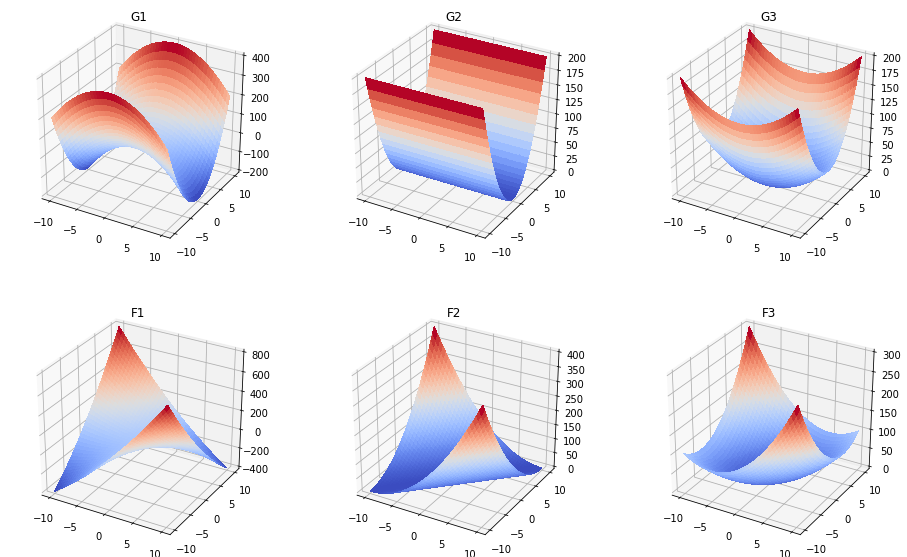

In [5]:
# Define the matrixes dictionary
matrixes = {"D1": D1, "D2": D2, "D3": D3, "A1": A1, "A2": A2, "A3": A3}

# Run the quad_fun_main
quad_fun_main(matrixes)

**Our conclusions**:

<font color="blue"> As mentioned before, we realised that the plots in 2D and 3D were very similar two to two. That happened due to the fact that the function g<sub>i</sub> was formed by the respective diagonal matrices of the matrices of f<sub>i</sub>. The only difference between them is the orientation and that happens because of their different eigenbasis.


#### **3. Complete the code of the Python function grad_descent().Follow the comments in the code.**

In [6]:
def multiply_ax(x):
    return A * x

In [7]:
def gradient_descent(callback,
                     b: np.matrix,
                     callback_params: dict,
                     initial_condition: np.matrix,
                     max_iters: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm (a
    gradient descent scheme with optimal adaptive step size) for the minimization
    of quadratic problems 

       f(x) = 1/2 x'Ax - bx. 

    It uses function handles. It requires a handle to a Python function that implements the product of matrix A with x.

    :param callback: handle (pointer) to a Python function implementing the product with matrix A.
    :param b: vector b, can be in matrix form (MxN)
    :param callback_params: a dictionary with the callback function params
    :param x0: initial condition, same dimensions as b (MxN)
    :param max_iters: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when the norm of the gradient is below the tolerance)

    :return x: value found (MxN)
    :return fs: evolution of the target function (total_iters x 1 vector)
    """
    Ax = callback(initial_condition, **callback_params)
    r = Ax -b                        # TODO: compute residual (the gradient)
    nr = np.multiply (r,r).sum()     # TODO: inner product of gradient
    
    # Note: since the variables can be stored as matrices (for example, x is an image)
    #       we use np.multiply(x1, x2) to compute the dot products.

    # Allocate memory for vector of energy values of the iterates
    fs  = []
    current_value = initial_condition

    # Start loop 
    it = 0

    while (sqrt(nr) > tolerance) and (it < max_iters):
        # Increase iteration counter
        it = it + 1
        print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))

        # TODO: Compute quadratic energy f = .5 <Ax - b,x> - 0.5* <b,x>
        value = 0.5 *np.multiply (r,current_value).sum() - 0.5 * np.multiply(b,current_value).sum ()
        fs.append(value)

        # 1. line search in r - compute time step alpha
        Ar = callback(r, **callback_params)
        alpha = nr / (np.multiply(r, Ar).sum())

        previous_value = current_value # keep x_old - just for visualization

        #2. TODO: update point x
        current_value = current_value - alpha * r

        # TODO: compute new residual r = Ax - b
        Ax = callback(current_value, **callback_params)
        r = Ax-b                           # TODO: compute residual (the gradient)
        nr = nr = np.multiply (r,r).sum()  # TODO: inner product of gradient
    
        # ----- plot current position! Just for visualization purposes -----
        if current_value.shape == (2, 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[0, 0], current_value[1, 0], marker = 'o', color = "k")
            ax.plot([previous_value[0, 0], current_value[0, 0]], 
                    [previous_value[1, 0], current_value[1, 0]], "-k")
            clear_output(wait=True)
            display(fig) 
        elif current_value.shape[0] > 1 and current_value.shape[1] > 1:
            # if x is a matrix (an image) (visualization of denoising) 
            if it % 10 == 0 or it == 1:
                if not ax:
                    fig, ax = plt.subplots(figsize = (12, 8))
                ax.imshow(current_value, cmap = "gray")
                clear_output(wait=True)
                display(fig) 
    
    print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))
    return current_value, np.matrix(fs).T#, it

#### **4. Complete the code of the Python function conj_grad. Follow the comments in the code**

In [8]:
def conjugate_gradient(callback,
                       b: np.matrix,
                       callback_params: dict,
                       initial_condition: np.matrix,
                       tolerance: float,
                       max_iters: int,
                       fig = None,
                       ax = None):
    """
    implementation of the conjugate gradient algorithm for the minimization of quadratic problems 

       f(x) = 1/2 x'Ax - bx. 

    It uses function handles. It requires a handle to a Python function that implements the product of matrix A with x.

    :param callback: handle (pointer) to a Python function implementing the product with matrix A. 
    :param callback_params: dictionary containing the params for the callback functions
    :param b: vector b, can be in matrix form (MxN)
    :param initial_conditions: initial condition, same dimensions as b (MxN)
    :param max_iters: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when the norm of the gradient is below the tolerance)
    
    :return x: value found (MxN)
    :return fs: evolution of the target function (total_iters x 1 vector)
    """

    Ax = callback(initial_condition, **callback_params)
    r = Ax-b                        # TODO: compute residual (the gradient)
    nr = np.multiply (r,r).sum()    # TODO: inner product of gradient
    d = -r.copy()                   # TODO: first descent direction is the negative grad.
    
    # Note: since the variables can be stored as matrices (for example, x is an image)
    #       we use np.multiply(x1, x2) to compute the dot products.

    # Allocate memory for vector of energy values of the iterates
    fs  = []
    current_value = initial_condition

    # Start loop 
    it = 0

    while (sqrt(nr) > tolerance) and (it < max_iters):
        # Increase iteration counter
        it = it + 1
        if it % 10 == 0:
            print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))

        # Compute quadratic energy f = .5 <Ax - b,x> - 0.5* <b,x>
        fs.append(0.5 * np.multiply(r, current_value).sum() - 0.5 * np.multiply(b, current_value).sum())

        # 1. TODO: line search in d - compute time step alpha
        Ad = callback(d, **callback_params)
        alpha = np.multiply (d,r).sum()/np.multiply(d,Ad).sum()

        previous_value = current_value # keep x_old - just for visualization

        #2. TODO: update point x
        current_value = current_value -alpha * d 

        # compute new residual r = Ax - b
        Ax = callback(current_value, **callback_params)
        r = Ax-b                          # TODO: compute residual (the gradient)
        nr_old = nr                       # inner product of the old residual
        nr = np.multiply (r,r).sum()      # TODO: squared norm of gradient

        # A-orthogonalization of r (Gram-Schmidt)
        # new search direction d is a linear combination of r and previous d
        # chosen so that it is A-orthogonal with the previous search directions
        beta_2 = nr/nr_old
        d = -r.copy()+beta_2*d
        
        # ----- plot current position! Just for visualization purposes -----
        if current_value.shape == (2, 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[0, 0], current_value[1, 0], marker = 'o', color = "r")
            ax.plot([previous_value[0, 0], current_value[0, 0]], 
                    [previous_value[1, 0], current_value[1, 0]], "-r")
            clear_output(wait=True)
            display(fig) 
        elif current_value.shape[0] > 1 and current_value.shape[1] > 1:
            # if x is a matrix (an image) (visualization of denoising) 
            if it % 10 == 0:
                if not ax:
                    fig, ax = plt.subplots(figsize = (12, 8))
                ax.imshow(current_value, cmap = "gray")
                clear_output(wait=True)
                display(fig) 
                
    print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))
    return current_value, np.matrix(fs).T, #it

#### **5. Run the functions conj_grad_test_i with i = 1, 2, 3.These script computes the minima of quadratic functions in R2 and R100. Complete the code if needed and answerthe questions in the code.**

In [9]:
A = None

**conj_grad_test_1**

In [10]:
#with gradient descent
def conj_grad_test_1():
    global A
    # We start by visualizing a problem in IR^2, and comparing the gradient descent with the conjugate gradient

    # --------------------------------------------------------------------------------------
    # create grid to plot contours of quadratic function -----------------------------------
    # --------------------------------------------------------------------------------------
    x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
    x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
    X, Y = np.meshgrid(x1, x2)

    # matrix containing all grid points as columns
    x = np.matrix([X.T.flatten(), Y.T.flatten()])

    # --------------------------------------------------------------------------------------
    # start with a trivial example: a quadratic function based on the identity matrix ------
    # --------------------------------------------------------------------------------------
    A = np.matrix([[1, 0], [0, 1]])
    b = np.matrix([[4], [3]])

    # evaluate function for all points in x
    Ax = A * x
    bx = b.T * x

    result = np.zeros((x1.shape[0], x2.shape[0]))
    for j in range(result.shape[0]):
        for i in range(result.shape[1]):
            result[i, j] = 0.5 * x[:, result.shape[0] * j + i].T * Ax[:, result.shape[0] * j + i] - bx[:, result.shape[0] * j + i]

    # Plot the contour of f
    fig = plt.figure()
    plt.contour(X, Y, result, 
                corner_mask = False, levels = 150, 
                linewidths=(1,), cmap = cm.coolwarm)
    plt.title('Level lines of f(x) = 1/2 x^T I x - bx')
  
    # run gradient descent 
    tolerance = 1e-5
    max_iters = 1000
    x1 = gradient_descent(callback = multiply_ax,
                          b = b, 
                          callback_params = {},  
                          initial_condition = np.matrix([[-7.5], [-7.5]]),  # TRY several starting points
                          tolerance = tolerance,
                          max_iters = max_iters, 
                          fig = fig,
                          ax = plt.gca())

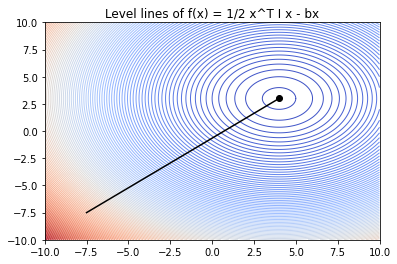

[1 of 1000]	-> |grad f(x)| = 0.0


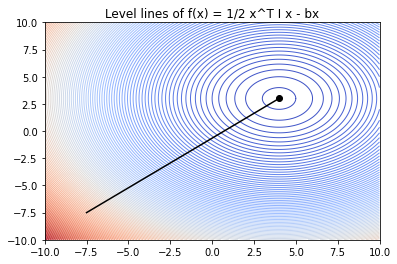

In [11]:
conj_grad_test_1()

In [12]:
#with conjugate descent 
def conj_grad_test_1_1():
    global A
    # We start by visualizing a problem in IR^2, and comparing the gradient descent with the conjugate gradient

    # --------------------------------------------------------------------------------------
    # create grid to plot contours of quadratic function -----------------------------------
    # --------------------------------------------------------------------------------------
    x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
    x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
    X, Y = np.meshgrid(x1, x2)

    # matrix containing all grid points as columns
    x = np.matrix([X.T.flatten(), Y.T.flatten()])

    # --------------------------------------------------------------------------------------
    # start with a trivial example: a quadratic function based on the identity matrix ------
    # --------------------------------------------------------------------------------------
    A = np.matrix([[1, 0], [0, 1]])
    b = np.matrix([[4], [3]])

    # evaluate function for all points in x
    Ax = A * x
    bx = b.T * x

    result = np.zeros((x1.shape[0], x2.shape[0]))
    for j in range(result.shape[0]):
        for i in range(result.shape[1]):
            result[i, j] = 0.5 * x[:, result.shape[0] * j + i].T * Ax[:, result.shape[0] * j + i] - bx[:, result.shape[0] * j + i]

    # Plot the contour of f
    fig = plt.figure()
    plt.contour(X, Y, result, 
                corner_mask = False, levels = 150, 
                linewidths=(1,), cmap = cm.coolwarm)
    plt.title('Level lines of f(x) = 1/2 x^T I x - bx')
  
    # run gradient descent 
    tolerance = 1e-5
    max_iters = 1000
    x2 = conjugate_gradient(callback = multiply_ax,
                          b = b, 
                          callback_params = {},  
                          initial_condition = np.matrix([[-7.5], [-7.5]]),  # TRY several starting points
                          tolerance = tolerance,
                          max_iters = max_iters, 
                          fig = fig,
                          ax = plt.gca())

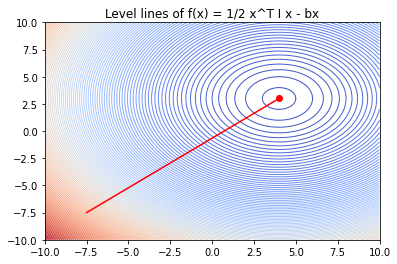

[1 of 1000]	-> |grad f(x)| = 0.0


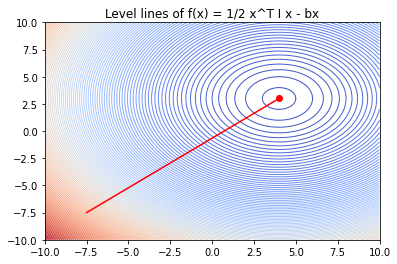

In [13]:
conj_grad_test_1_1()

- How many iterations does the gradient descent need to converge? Why? 
   
   <font color="blue"> It will need one iteration to converge. The crucial reason for that can be seen in the code above: we are working with the identity matrix, so it makes sense that the gradient descent converges in a unique iteration. Furthermore, when checking the computations by hand, we also realise that it holds. <font>

-  How many iterations would the conjugate gradient need to converge? Why?
   
 <font color="blue"> It will need one iteration to converge as well. The reason for that would be the same as previously mentioned. We are also working with the same matrix, that is, the identity one. 
<font color="blue"> For this method, we also know that its maximum number of iterations would be 2, as we are working with a problem of R^2(n=2), and this method converges at most n.

**conj_grad_test_2**

In [14]:
def conj_grad_test_2():
    global A
    # We start by visualizing a problem in IR^2, and comparing the gradient descent with the conjugate gradient

    # --------------------------------------------------------------------------------------
    # create grid to plot contours of quadratic function -----------------------------------
    # --------------------------------------------------------------------------------------
    x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
    x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
    X, Y = np.meshgrid(x1, x2)

    # matrix containing all grid points as columns
    x = np.matrix([X.T.flatten(), Y.T.flatten()])

    # --------------------------------------------------------------------------------------
    # a more general quadratic function ----------------------------------------------------
    # --------------------------------------------------------------------------------------
    A = np.matrix([[1, .9], [.9, 1]])
    b = np.matrix([[1], [2]])

    # evaluate function for all points in x
    Ax = A * x
    bx = b.T * x

    result = np.zeros((x1.shape[0], x2.shape[0]))
    for j in range(result.shape[0]):
        for i in range(result.shape[1]):
            result[i, j] = 0.5 * x[:, result.shape[0] * j + i].T * Ax[:, result.shape[0] * j + i] - bx[:, result.shape[0] * j + i]

    # Plot the contour of f
    fig = plt.figure()
    ax = plt.gca()
    plt.contour(X, Y, result, 
                corner_mask = False, levels = 150, 
                linewidths=(1,), cmap = cm.coolwarm)
    plt.title('Level lines of f(x) = 1/2 x^T I x - bx')

    # run gradient descent 
    tolerance = 0.00001
    max_iters = 1000
    x1 = gradient_descent(callback = multiply_ax,
                          b = b, 
                          callback_params = {},  
                          initial_condition = np.matrix([[1], [1]]),  # TRY several starting points
                          tolerance = tolerance,
                          max_iters = max_iters, 
                          fig = fig,
                          ax = ax)
    # run gradient descent 
    tolerance = 0.00001
    max_iters = 100
    x2 = conjugate_gradient(callback = multiply_ax,
                            b = b, 
                            callback_params = {},  
                            initial_condition = np.matrix([[5], [-5]]),  # TRY several starting points
                            tolerance = tolerance,
                            max_iters = max_iters, 
                            fig = fig,
                            ax = ax)
    return x1, x2

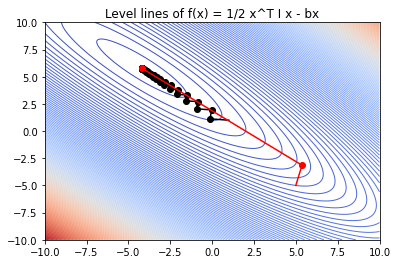

[2 of 100]	-> |grad f(x)| = 1.5432091458386043e-29


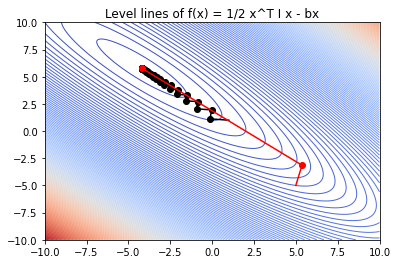

In [15]:
x1= conj_grad_test_2()

- How many iterations does the gradient descent need to converge?

 <font color="blue"> Checking it with the function *gradient_descent()*, we have seen that in this case the gradient will need 101 iterations in order to converge.

  <font color="blue"> To answer the following questions we created a new function, where we tried several starting points.

In [16]:
def conj_grad_test_22 ():
    global A
    # We start by visualizing a problem in IR^2, and comparing the gradient descent with the conjugate gradient

    # --------------------------------------------------------------------------------------
    # create grid to plot contours of quadratic function -----------------------------------
    # --------------------------------------------------------------------------------------
    x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
    x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
    X, Y = np.meshgrid(x1, x2)

    # matrix containing all grid points as columns
    x = np.matrix([X.T.flatten(), Y.T.flatten()])

    # --------------------------------------------------------------------------------------
    # a more general quadratic function ----------------------------------------------------
    # --------------------------------------------------------------------------------------
    A = np.matrix([[1, .9], [.9, 1]])
    b = np.matrix([[1], [2]])

    # evaluate function for all points in x
    Ax = A * x
    bx = b.T * x

    result = np.zeros((x1.shape[0], x2.shape[0]))
    for j in range(result.shape[0]):
        for i in range(result.shape[1]):
            result[i, j] = 0.5 * x[:, result.shape[0] * j + i].T * Ax[:, result.shape[0] * j + i] - bx[:, result.shape[0] * j + i]

    # Plot the contour of f
    fig = plt.figure()
    ax = plt.gca()
    plt.contour(X, Y, result, 
                corner_mask = False, levels = 150, 
                linewidths=(1,), cmap = cm.coolwarm)
    plt.title('Level lines of f(x) = 1/2 x^T I x - bx')

    # run gradient descent 
    tolerance = 0.00001
    max_iters = 1000
    x1 = gradient_descent(callback = multiply_ax,
                          b = b, 
                          callback_params = {},  
                          initial_condition = np.matrix([[-6], [4]]),  # TRY several starting points
                          tolerance = tolerance,
                          max_iters = max_iters, 
                          fig = fig,
                          ax = ax)
  
    return x1

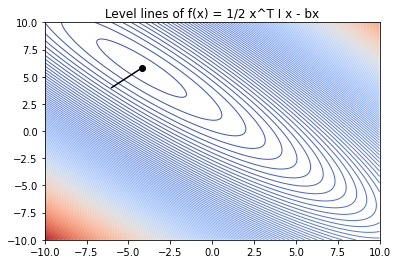

[1 of 1000]	-> |grad f(x)| = 1.9721522630525295e-31


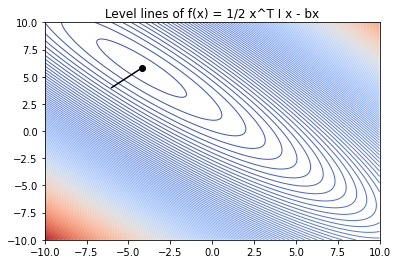

In [17]:
x1 = conj_grad_test_22()

In [18]:
# getting the number of iterations
# x1 [2]



*     Does the performance of the gradient descent depend on the position of the initial condition? 

 <font color="blue"> As we have already mentioned, we tried several points and we realised that the number of iterations changed. 


-  Are there any initial conditions for which the gradient descent converges in one iteration?

 <font color="blue"> We found that when taking points very close to the minima, the gradient descent converged in one iteration. 
 
  <font color="blue">For example, we took the point (-6,4) and we quickly realised that converged in a unique iteration.


 - Which is the angle between consecutive descent directions for the gradient descent? Why?  

 <font color="blue"> From the lectures, we know that the consecutives descent directions for the gradient descent are orthogonal, so the angle between them is 90º. That happens because we know that the optimal step length is given when the search direction is tangent to a level line.

- How many iterations would the conjugate gradient need to converge? Why?

 <font color="blue"> In this case we are visualizing a problem in IR^2. By knowing that, we know that the conjugate gradient would need at most 2 iterations , as it is the dimension of the matrix and we know that the conjugate gradient converges at most n.






In [19]:
def conj_grad_test_3():
    global A
    # Now we compare the gradient descent and the conjugate gradient for a problem in IR^100. 

    A = np.matrix(np.ones(shape = (100, 100)) + np.diag(np.arange(0, 100)))
    b = np.matrix(np.ones(shape = (100, 1)))

    # run gradient descent 
    tolerance = 10 ** -5
    max_iters = 10 ** 6
    x1, fs_1 = gradient_descent(callback = multiply_ax,
                          b = b, 
                          callback_params = {},  
                          initial_condition = np.zeros_like(b),  # TRY several starting points
                          tolerance = tolerance,
                          max_iters = max_iters)

    # run gradient descent 
    tolerance = 10 ** -5
    max_iters = 100
    x2, fs_2 = conjugate_gradient(callback = multiply_ax,
                            b = b, 
                            callback_params = {},  
                            initial_condition = np.zeros_like(b),  # TRY several starting points
                            tolerance = tolerance,
                            max_iters = max_iters)

    m = -0.5 * b.T * np.linalg.lstsq(A, b)[0]
    m = m[0,0]

    fig, ax = plt.subplots(figsize = (14, 8))
    ax.semilogy(fs_1 - m)
    ax.semilogy(fs_2 - m, 'r') 
    ax.legend(['gradient descent', 'conjugate gradient'])
    ax.set_title('logarithmic plot of f(x_i) - f^*')

[1 of 1000000]	-> |grad f(x)| = 100.0
[2 of 1000000]	-> |grad f(x)| = 3.7281462176038276
[3 of 1000000]	-> |grad f(x)| = 2.28177307426979
[4 of 1000000]	-> |grad f(x)| = 0.8793913050693438
[5 of 1000000]	-> |grad f(x)| = 0.9567206536855937
[6 of 1000000]	-> |grad f(x)| = 0.5080692459887963
[7 of 1000000]	-> |grad f(x)| = 0.6174591613824172
[8 of 1000000]	-> |grad f(x)| = 0.3477295782300828
[9 of 1000000]	-> |grad f(x)| = 0.44690729354241876
[10 of 1000000]	-> |grad f(x)| = 0.2607313022562153
[11 of 1000000]	-> |grad f(x)| = 0.3471701152395319
[12 of 1000000]	-> |grad f(x)| = 0.20731827789428744
[13 of 1000000]	-> |grad f(x)| = 0.2827853803058591
[14 of 1000000]	-> |grad f(x)| = 0.1716585992182595
[15 of 1000000]	-> |grad f(x)| = 0.2382460787922295
[16 of 1000000]	-> |grad f(x)| = 0.14637990894394984
[17 of 1000000]	-> |grad f(x)| = 0.20582991956637237
[18 of 1000000]	-> |grad f(x)| = 0.12763814125790185
[19 of 1000000]	-> |grad f(x)| = 0.1813044840443902
[20 of 1000000]	-> |grad f(x)| 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


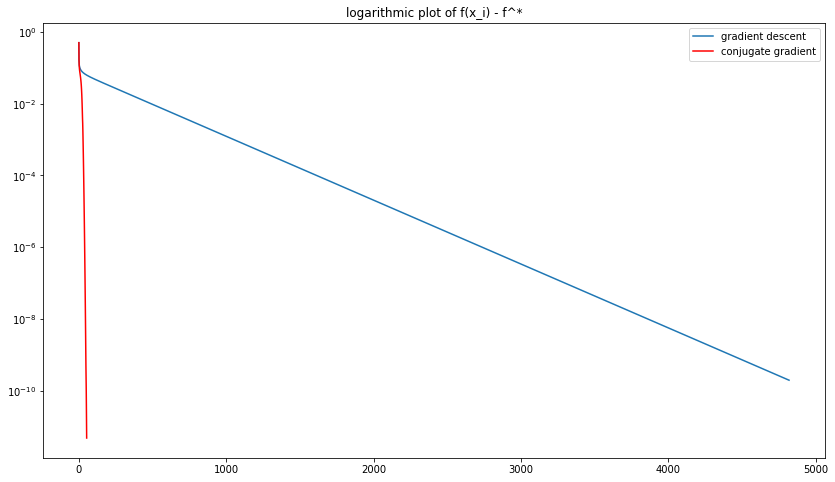

In [20]:
conj_grad_test_3()

- Define the problem matrix. Is it symmetric? Is it positive definite?
 
 <font color="blue"> As it can bee seen in the code above, the problem matrix is symmetric and its eigenvalues start in 0 and will finish in 99. So, as one of its eigenvalues is 0, the matrix is positive semidefinite. 
<font>

- Which one converges faster? 
 
 <font color="blue"> The one that converges faster, as it can be seen in the plot above, is the conjugate gradient, as it will converge at most n iterations.<font>
    

- Which is the order of convergence of the gradient descent? 
 
 <font color="blue"> One order convergence, as in the worst case, the gradient descent method converges as linear.

- Why is the logarithmic plot of the error for the gradient descent linear?

 <font color="blue"> From the starting point, the convergence to the optimal point follows a linear model and it affects directly on the logarithmic plot error. That is why we can see this plot for the gradient descent method follows a linear tendency.
<font>

- Which is the maximum number of iterations needed for the conjugate gradient? 

 <font color="blue"> As we already mentioned, the conjugate gradient converges at most n iterations, and as we know that in that case we are in R^100, the maximum number of iterations will be 100.

**Our conclusions**:

<font color="blue"> After having done all these tests, we have seen in general  that the conjugate method converges faster than the gradient descent. However, we would like to mention that they could converge in the same number of iterations in case that the input matrix were the identity matrix, as we have oserved before.


<font color="blue">  Furthermore, specifically for the last test, we would like to mention that when we increased the value of the initial conditions, we observed in the logarithmic plot that the one that got a big change was the gradient descent method, with an appearence of a logarithmic shape at the beginning. 
